# Naive Bayes
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/ccdsiub/ml-essentials/blob/master/docs/supervised-learning/classification/naive-bayes.ipynb)


## **Problem Statement**

<!-- ![iras.png](/src/ml-essentials/docs/assets/images/classification/iras.png) -->
<img src="../../assets/images/classification/iris.png" style="max-width: 60%;">

The Iris dataset is a widely-used dataset in machine learning. It contains measurements of 150 Iris flowers from three species: `Setosa`, `Versicolor`, and `Virginica`. The dataset includes four numerical features (shown in figure):
- `sepal length`:  length in cm
- `sepal width`: width in cm
- `petal length`: length in cm
- `petal width`: width in cm
- `target`: species index [`0`, `1`, `2`] which repectivly indicates [`Setosa`, `Versicolor`, `Virginica`]

The goal is to classify the flowers correctly based on these features. It is a balanced dataset with equal samples for each species, making it a popular choice for classification algorithms like Naive Bayes.

## **Import necessary packages**

We will be using the following packages for this task:

- `pandas` to load and manipulate data
- `numpy` to work with arrays of data
- `matplotlib` or `seaborn` for plotting and visualization
- `sklearn` for machine learning and data analysis tools

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

## **Load the data using sklearn**
The Iris dataset can be downloaded from the UCI Machine Learning Repository at the following link: [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris).
But instead of directly downloading the Iris dataset, we can conveniently access it using the `sklearn.datasets` library.

In our excercise we will use `load_iris()` function from the `sklearn.datasets` module to load the dataset directly and using `panda` we create dataframe.

In [2]:
from sklearn.datasets import load_iris

# Loading Iris dataset using load_iris
iris_dataset = load_iris()

# Creating dataframe
data = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])

print(f"data is a {type(data).__name__}")

data is a DataFrame


## **Exploring Data Information with Pandas**
Once we have loaded the Iris dataset into a pandas DataFrame, you can easily explore the data's information using various pandas functions. Here are some common pandas methods you can utilize to gain insights into the dataset:

`head()`: This function displays the first few rows of the DataFrame, allowing you to get a quick overview of the dataset.

In [3]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

`info()`: This method provides a summary of the DataFrame, including the number of rows, column names, data types, and the presence of any missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


`value_counts()`: Count the occurrences of each species in the 'target' column

In [5]:
print(data['target'].value_counts())

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


`describe()`: By using this, you can generate descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, maximum, and quartile values, for each numerical column in the DataFrame.

In [6]:
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

`shape`: The shape attribute returns a tuple representing the dimensions of the DataFrame, indicating the number of rows and columns.

In [7]:
data.shape

(150, 5)

`columns`: The columns attribute returns a list of column names in the DataFrame.

In [8]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

## **Visualize the data**

In this section we plot will boxplot and pairplot that are used to understand the distribution, outliers, patterns, and correlations in the Iris dataset.

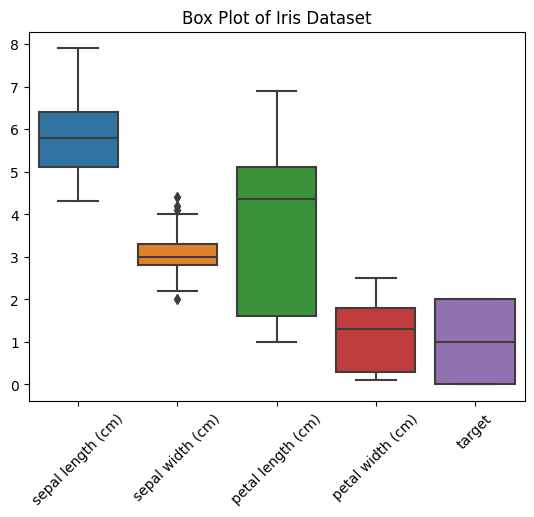

In [9]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Iris Dataset")
plt.show()

The code below removes outliers from the "sepal width (cm)" column of the dataset. Outliers are defined as values greater than 3.5 or less than 2.5. By applying a filter, the DataFrame is updated without these outliers, allowing for further analysis or modeling.

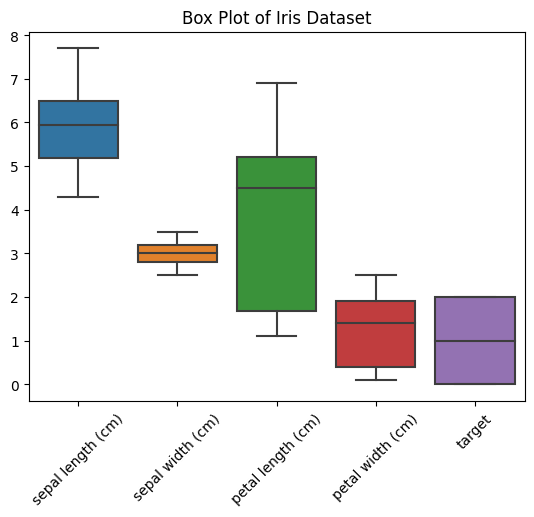

In [10]:
data = data[
    (data['sepal width (cm)'] >= 2.5) & (data['sepal width (cm)'] <= 3.5)
]
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Iris Dataset")
plt.show()

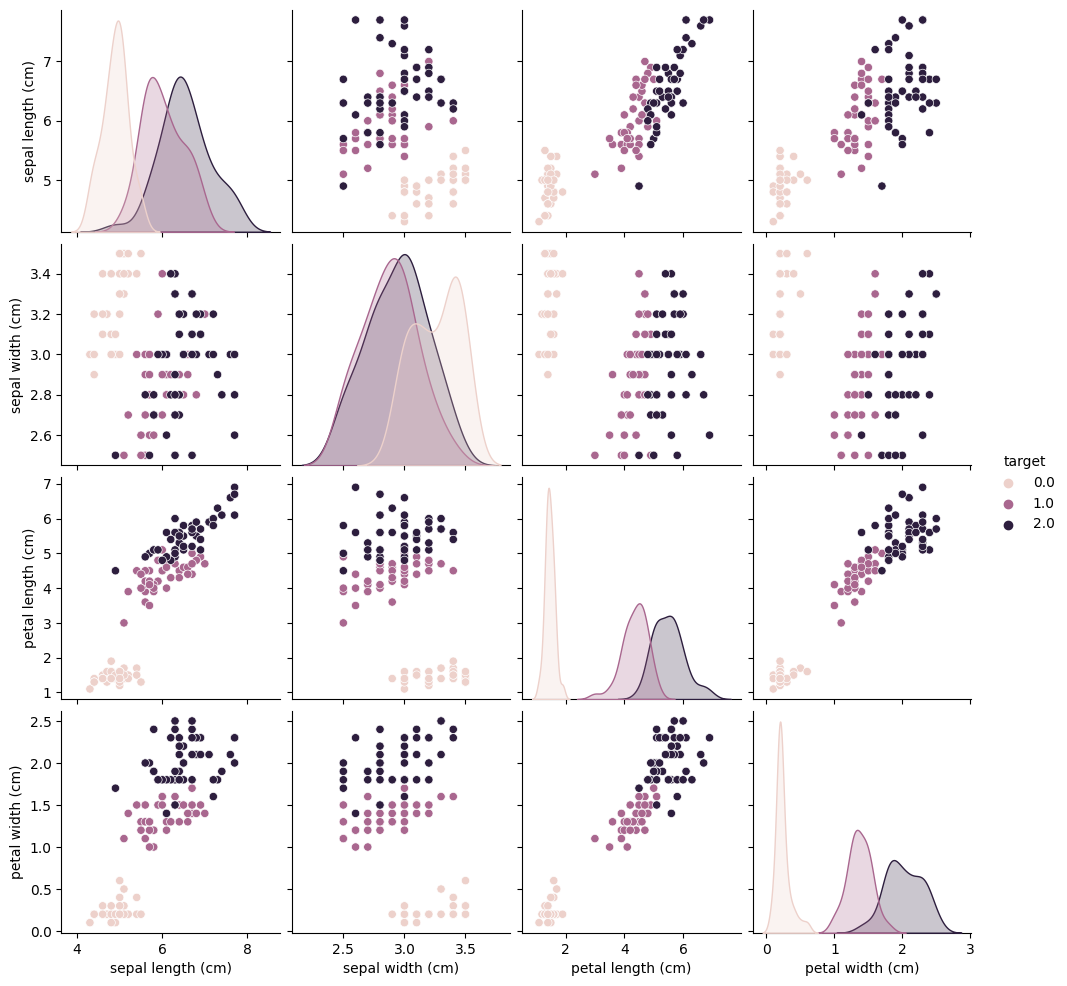

In [11]:
sns.pairplot(data, hue="target")
plt.show()

The pairplot visualization provides an overview of relationships between different pairs of features in the Iris dataset. By examining the scatterplots, you can identify patterns, correlations, feature importance, and potential outliers. It helps in understanding the distribution of data and making informed decisions regarding feature selection and classification algorithms.

### **Correlation matrix**

To get a numerical idea about the correlation between the features and the target variable, we will draw a correlation matrix.

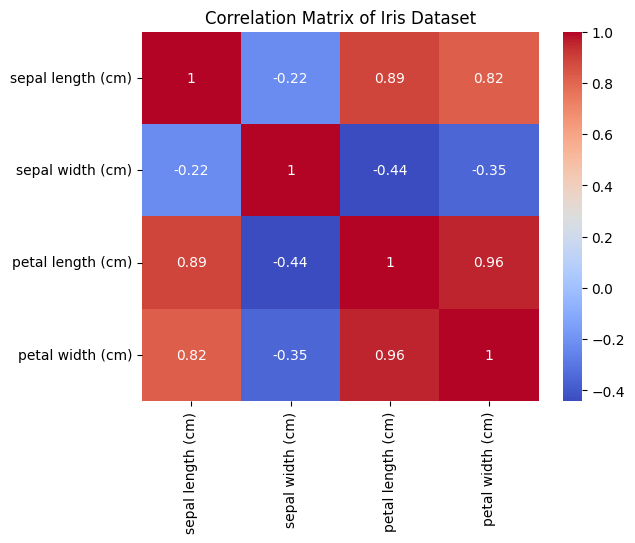

In [12]:
correlation_matrix = data.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

The correlation matrix heatmap visually represents the relationships between numeric columns in the Iris dataset. Warm colors indicate positive correlations, cool colors indicate negative correlations, and the intensity represents the strength of the relationship. It provides a quick overview of feature interdependencies and helps identify patterns and potential multicollinearity.

## **Naive Bayes Classification**

Naive Bayes classification is a machine learning algorithm that uses Bayes' theorem to predict the probability of different classes based on input features. It assumes that features are conditionally independent. It is simple, efficient, and effective for high-dimensional data, making it widely used in various domains such as text classification and spam filtering. Lecture notes on [Bayes' theorem](https://faculty.washington.edu/tamre/BayesTheorem.pdf) (University of Washington).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


## **Classification Report**
In this section, the Naive Bayes classifier's performance is assessed using a confusion matrix and a classification report. Additionally, a decision chart is plotted to visualize the linear separation between two features, providing insights into the classifier's performance and its ability to distinguish between classes.

Classification Report
-----------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.91      0.91      0.91        11
         2.0       0.83      0.83      0.83         6

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24



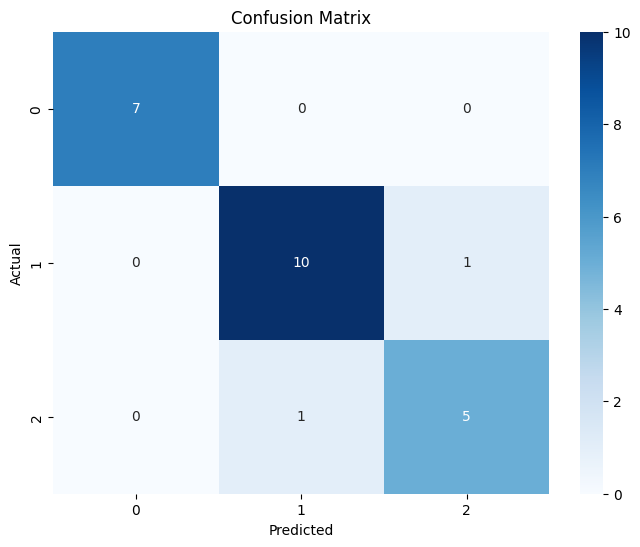

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Print classification report
print("Classification Report\n-----------------------")
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The decision chart illustrates the linear separation between the 'petal length (cm)' and 'petal width (cm)' features. It visually displays how the classifier distinguishes between classes based on these two specific features, providing insights into the classification boundaries.

/src/ml-essentials/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


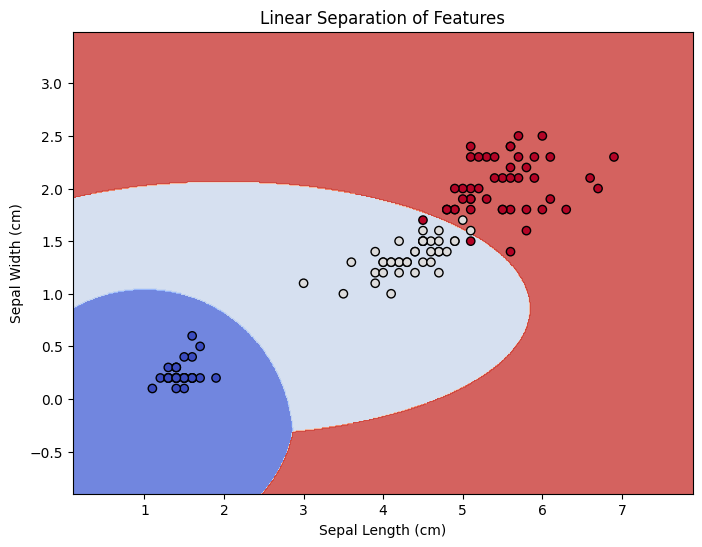

In [15]:
# Select the first two features for visualization
X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the Naive Bayes classifier on the selected features
nb_classifier.fit(X, y)

# Generate a meshgrid to plot the decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points with decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Linear Separation of Features')
plt.show()